In [ ]:
## Alrighty so we're going to be binning phytoplankton with temperature and seeing how that works out
## This is going to be plotted using a histogram and not a color map like before
## REMEMBER: just like Steve said, it takes some time to get used to so don't feel stressed out if you don't get it the first time!
## Ask the lads Graeme or Steve if you need some advice/help! 


In [1]:
# So first thing's first, let's import the proper packages

import xarray as xr
import numpy as np
from matplotlib import pyplot as plt 



In [2]:
## And let's get those directories established! 
# Let's start with the directories for temperature 

rootdir = '/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/'
datadir_temperature = 'ocean_monthly_z/ts/monthly/5yr/'
filename_temperature = 'ocean_monthly_z.071101-071512.thetao.nc'

# Now let's establish the directories for phytoplankton. The rootdir (root directory) will be the same. 

datadir_phytoplankton = 'ocean_cobalt_omip_tracers_month_z/ts/monthly/5yr/'
filename_phytoplankton = 'ocean_cobalt_omip_tracers_month_z.071101-071512.phyc.nc'


temperature = xr.open_dataset(rootdir+datadir_temperature+filename_temperature)
phytoplankton = xr.open_dataset(rootdir+datadir_phytoplankton+filename_phytoplankton)


/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/xarray/coding/times.py:419: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  self.use_cftime)


In [3]:
print(temperature.thetao)

# We have our data array for temperature here

<xarray.DataArray 'thetao' (time: 60, z_l: 35, yh: 576, xh: 720)>
[870912000 values with dtype=float32]
Coordinates:
  * time     (time) object 0711-01-16 12:00:00 ... 0715-12-16 12:00:00
  * xh       (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh       (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * z_l      (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
Attributes:
    long_name:      Sea Water Potential Temperature
    units:          degC
    cell_methods:   area:mean z_l:mean yh:mean xh:mean time: mean
    cell_measures:  volume: volcello area: areacello
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_water_potential_temperature


In [4]:
print(phytoplankton.phyc)

# We also have the data array for phytoplankton 

<xarray.DataArray 'phyc' (time: 60, z_l: 35, yh: 576, xh: 720)>
[870912000 values with dtype=float32]
Coordinates:
  * time     (time) object 0711-01-16 12:00:00 ... 0715-12-16 12:00:00
  * xh       (xh) float64 -299.8 -299.2 -298.8 -298.2 ... 58.75 59.25 59.75
  * yh       (yh) float64 -77.91 -77.72 -77.54 -77.36 ... 89.47 89.68 89.89
  * z_l      (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
Attributes:
    long_name:      Phytoplankton Carbon Concentration
    units:          mol m-3
    cell_methods:   area:mean z_l:mean yh:mean xh:mean time: mean
    cell_measures:  volume: volcello area: areacello
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  mole_concentration_of_phytoplankton_expressed_as_carbon_i...


In [5]:
# Alright, let's do some binning! 

# First let's merge our phytoplankton and temperature dataarays
ds = xr.merge([temperature, phytoplankton])

# Set temperature as a 'coordinate' in the new dataset
ds = ds.set_coords('thetao')

# Use the groupby_bins functionality of xarray to group the phytoplankton measurements into temperature bins 
theta_bins = np.arange(-2,30,1) # This specifies the range of the bins! It's totally up to how you to arrange your graph. 
phyto_in_theta = ds.phyc.isel(time=5).groupby_bins('thetao',theta_bins)

/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/nbhome/Alexandra.Matthews/miniconda/envs/basic/lib/python3.7/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


In [6]:
phyto_in_theta.count(xr.ALL_DIMS)

<xarray.DataArray 'phyc' (thetao_bins: 31)>
array([473074, 301840, 773846, 746644, 988101, 587632, 410546, 322267, 209297,
       183924, 179141, 169086, 148724, 140976, 126555, 125687, 110397,  93960,
        78576,  68609,  61491,  63245,  62657,  62143,  57121,  54572,  56465,
        61548,  68392,  69183,  71260])
Coordinates:
  * thetao_bins  (thetao_bins) object (-2, -1] (-1, 0] ... (27, 28] (28, 29]
    time         object 0711-06-16 00:00:00

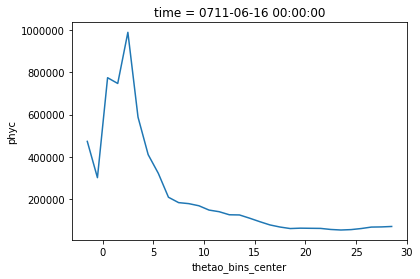

In [7]:
phyto_in_theta.count(xr.ALL_DIMS).plot()

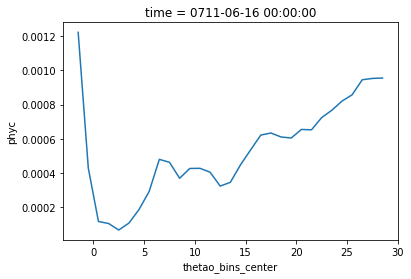

In [8]:
phyto_in_theta.mean(xr.ALL_DIMS).plot()